# Integrating Rate Laws

*SymPy* can perform integration and differentiation operations on many expressions. Let us explore integrating the simple rate equations that you are familiar with.

## Integrating First Order Reactions

A basic first order reaction might be described as such...

$$ A \xrightarrow{k} B $$ 

The rate can be expressed as the disappearance of A over time and is equal to the rate constant multiplied by the concentration of reacatant at a given time point...

$$ -\frac{d}{dt}[A]_t = k[A]_t $$

We can state that the amount of reactant consumed at a give time point is $x$ and that the concentration of reactant is the initial concentration less this value.

$$ [A]_t = [A]_0 - x $$

Substitute this into the equation for rate and we get...

$$ -\frac{d}{d t}([A]_0 - x) = k([A]_0 - x) $$

...which can be simplified to give...

 $$   \frac{d x}{d t} = k([A]_0 - x) $$

In your first year calculus class you would solve this by collecting the differentials for $x$ and $t$ on either side of the equation and then integrating each side over the span of time.

$$ \frac{d x}{[A]_0 - x} = k\,dt $$
$$ \int_0^x \frac{d x}{[A]_0 - x} = \int_0^t k\,dt $$

### Using Substitution

We have *SymPy* to perform the integration for us. This is accomplished by using the `sympy.dsolve()` function. We will be asking $SymPy$ to solve the differential equation stated above like so...

$$ \text{sym.dsolve}\left( \frac{d x}{d t} = k([A]_0 - x) \right) $$

Examine the code below. Observe that we established a differential equation, `diffeq` and then applied the `sympy.dsolve` function to it. In this case, we know that $x_t = 0$ and we use the "initial conditions" parameter of `dsolve` to set set that fact. This will give us the definite integral starting a time = $0$ to time = $t$.



In [9]:
import sympy as sym

t = sym.symbols('t')     ### create x as a 'symbol', not a variable
k = sym.symbols('k')     ### create k as a 'symbol'
A0 = sym.symbols('A0')   ### create A0 as a 'symbol'

xt = sym.Function('x_t')    ### create x as a 'function', not a variable

lhs = xt(t).diff(t)       ### differential of x(t) w.r.t. t
rhs = k*(A0 - xt(t))

print("The differential equation is...")
diffeq = sym.Eq(lhs, rhs)   ### create a sympy equation
display(diffeq)             ### display that equation

print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})     ### Solve the differential equation. 
                                            ### Initial condition is x(t) = 0 when t = 0
display(res)

The differential equation is...


Eq(Derivative(x_t(t), t), k*(A0 - x_t(t)))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A0 - A0*exp(-k*t))

### Using *SymPy* Substitutions
Below is the same operationa as above but here I will demonstrate the symbolic math features of *SymPy*. Here we start with the rate law and use *SymPy* to make the substitutions discussed above. We will start with...

$$ -\frac{d}{dt}[A]_t = k[A]_t $$

...and then substitute in the expression for $A_t$ in terms of $x$ using *SymPy*

$$ [A]_t = [A]_0 - x $$

We will the solve the differential that is prosuced by the substitution. Observe we get the same answer.


In [10]:
import sympy as sym

t = sym.symbols('t')     ### create x as a 'symbol', not a variable
k = sym.symbols('k')     ### create k as a 'symbol'
At = sym.symbols('A_t')  ### create At as a 'symbol'
A0 = sym.symbols('A0')   ### create A0 as a 'symbol'

xt = sym.Function('x_t')    ### create x as a 'function', not a variable

lhs = sym.Derivative(-At, t) ### Using Derivative function to get differential of A(t) w.r.t. t
                            ### could not used At.diff(t) because At is not a function 
rhs = k*(At)

diffeq = sym.Eq(lhs, rhs)   ### create a sympy equation
print("The initial differential equation is...")
display(diffeq)             ### display that equation

diffeq = diffeq.subs({At: (A0 - xt(t))})

print("After substituting the differential equation is...")
display(diffeq)             ### display that equation


print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})     ### Solve the differential equation. 
                                            ### Initial condition is x(t) = 0 when t = 0
display(res)
#dir(diffeq)

The initial differential equation is...


Eq(Derivative(-A_t, t), A_t*k)

After substituting the differential equation is...


Eq(Derivative(-A0 + x_t(t), t), k*(A0 - x_t(t)))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A0 - A0*exp(-k*t))

## The Final Answer

We now have an expression for $x(t)$...

$$ x_t = [A]_0 - [A]_0 e^{-k t}$$

...and we know that...

$$ [A]_t = [A]_0 - x_t $$

So we can combine the two equation above and we get an expression for $[A]_t$ in terms of $t$...

$$  [A]_0 - [A]_t = [A]_0 - [A]_0 e^{-k t} $$
$$  [A]_t = [A]_0 e^{-k t} $$
 

In [11]:
x = sym.symbols('x')     ### create x as a 'symbol', not a variable or function
#At = sym.symbols('A_t')  ### reset At as a 'symbol'

xt = res.rhs   ### Get the expression for x(t)
print("The expression for x(t) is...")
display(xt)

eq2 = sym.Eq(At, A0-x)  ### create an equation that defines A(t) in terms of A0 and x
print("The equation for A(t) in terms of x(t) is...")
display(eq2)

eq2 = eq2.subs(x, xt)  ### xt is an expression for x. Substitute x for xt.
print("The equation for A(t) after substituting in the term for x(t)")
display(eq2)


The expression for x(t) is...


A0 - A0*exp(-k*t)

The equation for A(t) in terms of x(t) is...


Eq(A_t, A0 - x)

The equation for A(t) after substituting in the term for x(t)


Eq(A_t, A0*exp(-k*t))

## Plotting *SymPy* Expressions

It is useful to plot the result of our integration to see if it is as expected.

### Using *SymPy* Plotting Tools

*SymPy* contains plotting tools that can plot an expression without needing to calculate $x$ and $y$ values. The `sympy.plotting.plot()` dunction will plot the expression. This is different than the *MatPlotLib* set of plotting tools although there are similarities. 

We will need to substitutre in values for the constants, $A_0$ and $k$, and then extract the right-hand-side of the equation to get the expression that defines $x_t$. We then use that expression in the `sympy.plotting.plot()` function. Consider the example of the code below.

The expression that describes A(t) is...


A0*exp(-k*t)

After substituting values for the constnats, A(t) is...


0.1*exp(-1.2*t)

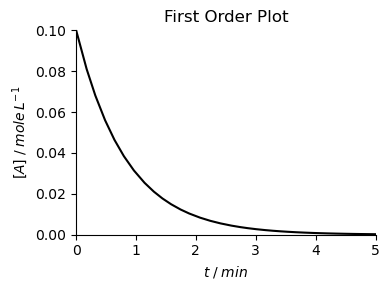

In [12]:
At_expr = eq2.rhs

print("The expression that describes A(t) is...")
display(At_expr)      


At_expr = At_expr.subs({A0: 0.1, k:1.2})   ### Substitute values for the constants

print("After substituting values for the constnats, A(t) is...")
display(At_expr)                         

p = sym.plotting.plot(At_expr, (t,0,10),
                  line_color='black', 
                  title='First Order Plot',
                  xlabel = r"$t\;/\;min$",
                  ylabel = r"$[A] \; / \; mole\,L^{-1}$",
                  axis = True,
                  xlim = (0, 5),
                  ylim = (0, .10),
                  size = (4,3),
                  show = False)
p.save("test.pdf")
p.show()


### Using *MatPlotLib* Plotting Tools

*SymPy* plotting tools are powerful and useful but I am much more familiar with the plotting features of the *MatPlotLib* library. To use this plotting method I must plot actual values of $x$ and $y$. 

First I will convert the expresion for concentration to a function. Then I will feed in a set of $x$-values and the function will return a set of $y$-values. In the code below, I take the expression from the code block above for $[A]$ at time $t$ and I use the `sympy.lambdify()` tool to make a corresponding function object. 

0.1*exp(-1.2*t)

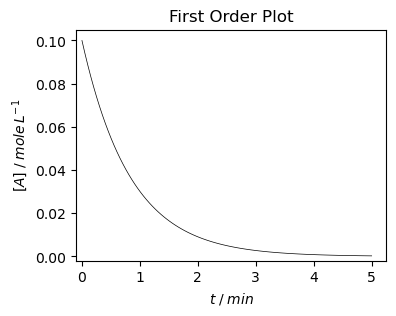

In [13]:
from matplotlib import pyplot as plt
import numpy as np


display(At_expr)                         

f = sym.lambdify(t, At_expr)
t_line = np.linspace(0,5,100)

x = t_line           ### I always plot x and y so I can more easily reuse plotting code
y = f(t_line)        

plt.rcdefaults()    ### resets the plot defaults so we always start in the same place
#plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

ax.plot(x, y,
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
ax.set( xlabel= r"$t\;/\;min$", 
        ylabel=r"$[A] \; / \; mole\,L^{-1}$",
        title = "First Order Plot",
        xlim=[-0.1, None],                  
        ylim=[-0.002, None]      
      )

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show()     

## Summary

We have also solved the rate law for a first-order reaction by defining the rate law as a differential equation and using the `dsolve` function of *SymPy*. This gives us an analytical solution that we can use to calculate the concentration of the reactant at any time point.

We have also plotted the integrated rate law using the tools of *SymPy* and also by converting the result into a function and plotting the calculate $x$ and $y$ values using the tools of *MatPlotLib*.

### Why Do This?

Finding an analytical solution to a differential equation will give an intergrated rate law that provides the concentration of a reactant at any time point. This could be used to fit experimental data and obtain reaction parameters. Integrated rate laws for first order reactions can be linearized easily but some rate laws cannot. Being able to construct an function to which data can be fit is a useful skill.